1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare

Download House Price (Tehran, Iran) dataset from [Kaggle](https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran) or [GitHub](https://github.com/mokar2001/House-Price-Tehran-Iran)

2. Load Dataset

In [2]:
data = pd.read_csv("HousePrice.csv")
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3469,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3470,75,2,False,False,False,Parand,3.650000e+08,12166.67
3471,105,2,True,True,True,Dorous,5.600000e+09,186666.67


3. Remove Duplicate Rows

In [3]:
data.drop_duplicates(inplace=True)
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3467,63,1,True,True,False,Feiz Garden,1.890000e+09,63000.00
3468,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3469,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3471,105,2,True,True,True,Dorous,5.600000e+09,186666.67


4. Check Dataset Information  

 - Total entries and columns

- Data types (int64, float64, bool, object)

- Non-null values for each column

- Memory usage of the DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3265 non-null   int64  
 1   Room        3265 non-null   int64  
 2   Parking     3265 non-null   bool   
 3   Warehouse   3265 non-null   bool   
 4   Elevator    3265 non-null   bool   
 5   Address     3242 non-null   object 
 6   Price       3265 non-null   float64
 7   Price(USD)  3265 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 162.6+ KB


5. Summary Statistics 
 
- count, mean, std, min, 25%, 50%, 75%, max for numerical columns.

In [5]:
data.describe()

,Area,Room,Price,Price(USD)
count,3265.000000,3265.000000,3.265000e+03,3.265000e+03
mean,107.543645,2.086371,5.450657e+09,1.816886e+05
std,70.734379,0.763691,8.249013e+09,2.749671e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,70.000000,2.000000,1.417500e+09,4.725000e+04
50%,90.000000,2.000000,2.950000e+09,9.833333e+04
75%,121.000000,2.000000,6.100000e+09,2.033333e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


6. Check for Missing Values

In [6]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

7. Preprocessing  

- Drop Address column since it’s not needed for numerical modeling.

- Replace Boolean values (True/False) with integers (1/0).

- data.sample(5) shows 5 random rows after preprocessing.

In [7]:
data.drop("Address", axis=1, inplace=True)
data.replace([True, False], [1, 0], inplace=True)
data.sample(5)

C:\Users\Faezeh\AppData\Local\Temp\ipykernel_9320\2129980776.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace([True, False], [1, 0], inplace=True)


,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
3379,68,2,1,1,1,2.270000e+09,75666.67
1943,80,2,1,1,1,4.250000e+09,141666.67
829,62,2,1,1,1,2.100000e+09,70000.00
1894,155,3,1,1,1,9.000000e+09,300000.00
1509,85,2,1,1,1,2.750000e+09,91666.67


8. Correlation Matrix  

- Displays correlation between all numerical columns.

- Useful for identifying relationships between features like Area and Price.

In [8]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670137,0.199765,0.073080,0.047987,0.720990,0.720990
Room,0.670137,1.000000,0.279249,0.126244,0.183216,0.569476,0.569476
Parking,0.199765,0.279249,1.000000,0.428073,0.429527,0.192993,0.192993
Warehouse,0.073080,0.126244,0.428073,1.000000,0.204242,0.109675,0.109675
Elevator,0.047987,0.183216,0.429527,0.204242,1.000000,0.110417,0.110417
Price,0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000
Price(USD),0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000


9. Creates a 2D scatter plot to visualize the relationship between Area and Price.

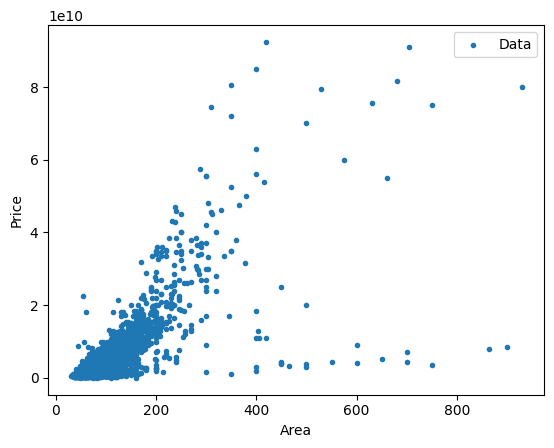

In [9]:
plt.scatter(data['Area'], data['Price'], marker='.')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(["Data"])
plt.show()

10. Creates a 3D scatter plot showing Area, Room, and Price relationships.

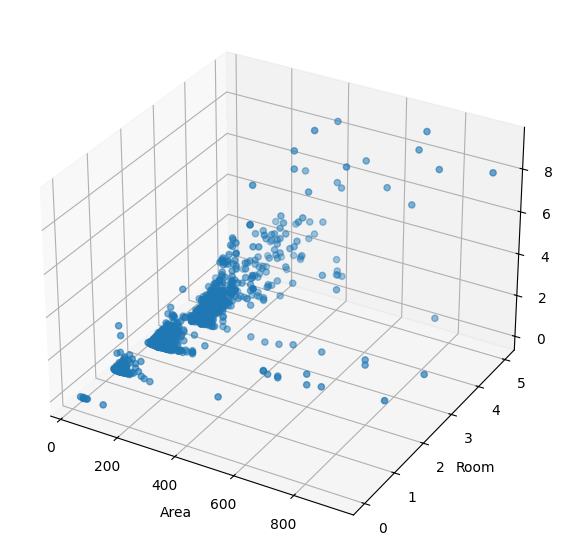

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['Area'], data['Room'], data['Price'])
ax.set_xlabel('Area')
ax.set_ylabel('Room')
ax.set_zlabel('Price')
plt.show()

11. Prepare Features and Target  

- X: Feature matrix with Area and Room.

- Y: Target vector with Price.

- Displays shape of both arrays.

In [11]:
X = np.array(data[["Area", "Room"]])
Y = np.array(data[["Price"]])

print(X.shape)
print(Y.shape)

(3265, 2)
(3265, 1)


12. Split Data into Training and Testing Sets  

- train_test_split divides data into:

- Training: 75% (default)

- Testing: 25%

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2448, 2)
(2448, 1)
(817, 2)
(817, 1)


13. Train Custom Linear Least Squares Model  

- Initializes LinearLeastSquare model.

In [13]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)

In [14]:
Y_pred = lls.predict(X_test)

14. Creates a 3D plot with:  

- Scatter points of actual data.

- Regression plane calculated using model weights lls.w.

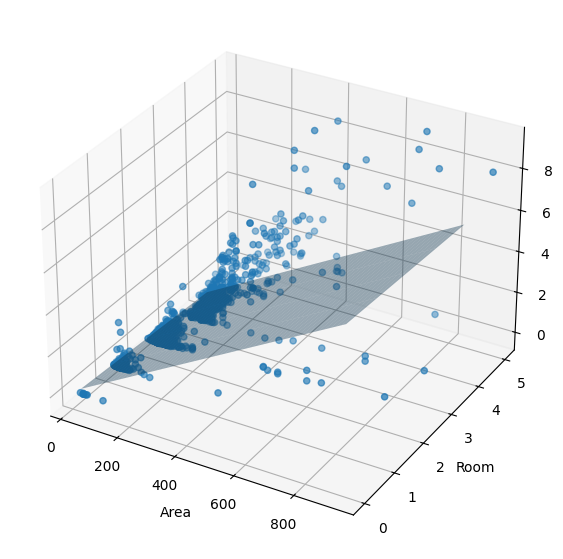

In [15]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_arange = np.arange(X_train[:,0].min(), X_train[:,0].max())
y_arange = np.arange(X_train[:,1].min(), X_train[:,1].max())
px, py = np.meshgrid(x_arange, y_arange)
 
pz = px * lls.w[0] + py * lls.w[1]
ax.plot_surface(px, py, pz, alpha = 0.4)

ax.scatter(data['Area'], data['Room'], data['Price'])
ax.set_xlabel('Area')
ax.set_ylabel('Room')
ax.set_zlabel('Price')
plt.show()

15. Evaluate Model with MAE

In [16]:
lls.evaluate(X_test, Y_test, "MAE")

3346803855.8703537

16. Predict Price for a New House

In [17]:
x_test = np.array([[170, 3]])
y_pred = lls.predict(x_test)
print("Price:", y_pred[0, 0])

Price: 9744634921.06563


17. Compare with scikit-learn LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train , Y_train)

Y_pred = model.predict(X_test)
mae_loss = np.mean(np.abs(Y_pred - Y_test))
mae_loss

3043131026.9191985